## Introduction
Recommendation systems are systems designed to allow prediction of future preferences to customers or users based on different factors, such previous preferences and interest, users or customers with similar preferences. With the advancement of technology in the movie industry, recommender systems have become one of the best tools used to market movies to different users by connecting them to various genres of  films with characteristic features that match the users' preferences.
In this project, we shall explore The MovieLens dataset to build a recommendation system. The MovieLens dataset was developed by the GroupLens Research Lab at the university of Minnesota. The dataset offers a rich collection of moving ratings, comprising of movie ratings provided by users and metadata data such as movie titles, genres and release years, hence making it suitable for studying user preferences and building recomendations systems 

## Problem Statement:

Whereas many people prefer watching movies in their leisure time, the abundance of movie options available across various streaming platforms makes it challenging to decide on what movie to watch next. To enhance user experience and increase user engagement, this projects aims to develop a recommendation system model that offers personalized top 5 movie recommendations to a user, based on their ratings of other movies.

## Data Understanding
The MovieLens Dataset, sourced from the GroupLens research lab at the University of Minnesota(https://grouplens.org/datasets/movielens/latest/), provides a comprehensive collection of movie ratings and associated metadata. The full dataset contains approximately 33,000,000 ratings and 2,000,000 tag applications applied to 86,000 movies by 330,975 users. Smaller datasets are also available for research and purposes. For this project, we shall be using MovieLens 100K dataset, which contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. The dataset offers a diverse range of user preferences and movie characteristics hence suitable for robust analysis and recommendation generation. Additionally, it's relatively large size and diversity ensures a comprehensive analysis that is representative of real-world scenarios.

**Key Features**
1. Ratings - User rating on movies on a scale of 1-5, showing user preferences and satisfaction levels.
2. Movie Metadata - Movie Title and ID and movie genre to facilitate categorization and analysis of movies based on their characteristics
3. User ID - Unique identifiers for users for tracking individual preferences and behaviors
4. Timestamp - Records of time a movie was rated

The project will leverage on these key features to explore insights into user preferences, movie charecteristics and trends to generate a personalized movie recommendation system.

**Limitations**
1. Sparsity - Not all users have rated all movies, hence sparsity in the interaction matrix may pose challenges to our collaborative filtering algorithms
2. Absence of features such as demographics could limit depth of our analysis

These limitations however present an opportunity for future innovations to come up with a comprehensive model that addresses these challenges.

## Abstract:
This project utilizes the MovieLens dataset from the GroupLens research lab to build a recommendation system for personalized movie recommendations. The dataset includes user ratings for movies, making it ideal for collaborative filtering techniques. The data preparation process involved merging the ratings and movies datasets, as well as performing exploratory data analysis to understand the distribution of ratings and movie genres. Text preprocessing was also performed, including removing stopwords from movie titles and tokenization.
For modeling, the Surprise library was used, specifically the SVD algorithm. SVD is a matrix factorization technique that helps identify latent factors representing user preferences and item characteristics. The performance of the recommendation system was evaluated using cross-validation with RMSE as the evaluation metric. A lower RMSE indicates better performance in predicting user ratings.
The final recommendation system demonstrated promising performance, with a low RMSE suggesting that the model accurately predicts user ratings. This implies that the personalized movie recommendations generated by the system are likely to be relevant and useful to users.


## Objectives:
1. The system aims to enhance user engagement and satisfaction by providing tailored movie suggestions that align with their preferences
2. To create a recommendation system that utilizes collaborative filtering to analyze user ratings,
3. Generate accurate movie recommendations for each user.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
!pip install surprise

## DATA PREPARATION

We are going to load the four csv files i.e. ratings, links, tags and movies then explore the data.

In [3]:
# loading the different datasets
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
links= pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


We will then check the shape,unique values and information from our data.

In [7]:
#Understanding the shape of the different data sets
ratings_shape = ratings.shape
movies_shape = movies.shape
tags_shape = tags.shape
links_shape= links.shape
print('ratingshape:', ratings.shape)
print('moviesshape:', movies.shape)
print('tagsshape:', tags.shape)
print ('linksshape:', links.shape)

ratingshape: (100836, 4)
moviesshape: (9742, 3)
tagsshape: (3683, 4)
linksshape: (9742, 3)


In [8]:
# Let's find the number of unique users and movies in the ratings dataset
unq_users = ratings.userId.nunique()
unq_movies = ratings.movieId.nunique()
print(f'Unique users: {unq_users}')
print(f'Unique movies: {unq_movies}')

Unique users: 610
Unique movies: 9724


In [9]:
ratings.info ()
movies. info ()
tags. info ()
links. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

We will merge the ratings and movies dataframes using the movieId column and leave out tags and links as we deem them unnecessary for our objective.

In [10]:
# Merging the ratings and movies data sets
merged_df = pd.merge(ratings,movies, on='movieId', how='inner')

merged_df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Checking for any missing values

In [11]:
#checking for missing values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

No missing values found in our merged df

**Now we will check the description of our data**

In [12]:
#statistical summary of the data
merged_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Checking for any duplicated values

In [13]:
#checking for duplicates
merged_df.duplicated().sum()

0

Exploring the shape,data types, info and missing values in the merged df

In [14]:
#checking for the number if rows and columns
merged_df.shape

(100836, 6)

In [15]:
#checking the data type
merged_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

In [16]:
#checking for the overview of the data
merged_df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [17]:
#Checking for null values
merged_df.isnull(). sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

No missing values found in the merged df

We will now check for any outliers in the rating column of the merged df

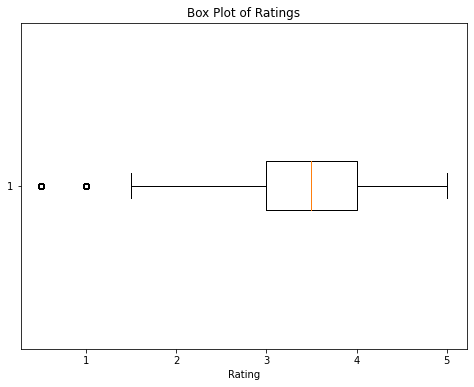

Summary Statistics:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Outliers:
        userId  movieId  rating   timestamp  \
26          76        1     0.5  1439165548   
235        217        3     1.0   955944713   
242        294        3     1.0   966596854   
245        308        3     0.5  1421374465   
260        552        3     1.0  1111472953   
...        ...      ...     ...         ...   
100530     605    35347     1.0  1277096832   
100684     610     8840     1.0  1479542247   
100722     610    61818     0.5  1493848943   
100734     610    72424     0.5  1493849030   
100823     610   145951     0.5  1493849019   

                                         title  \
26                            Toy Story (1995)   
235                    Grumpier Old Men (1995)   
242                    Grumpier Old Men (

In [18]:
# Calculate IQR and bounds
q1 = merged_df['rating'].quantile(0.25)
q3 = merged_df['rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = merged_df[(merged_df['rating'] < lower_bound) | (merged_df['rating'] > upper_bound)]

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['rating'], vert=False)
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()
# Print summary statistics and outliers
print("Summary Statistics:")
print(merged_df['rating'].describe())
print("\nOutliers:")
print(outliers)

The median rating is around 3. There are more ratings that are lower than 3 than there are ratings that are higher than 3. There are a few outliers that are both higher and lower than the rest of the ratings.

We are not worried about the outliers because it is a small percentage of the data we have and also within 0-5 rating range.

## EXPLORATORY DATA ANALYSIS

Next, we will perform EDA to analyze and summarize the main characteristics of the dataset, by employing visualizations.

We will split the genres column to give us the specific genres of movies with their frequencies.

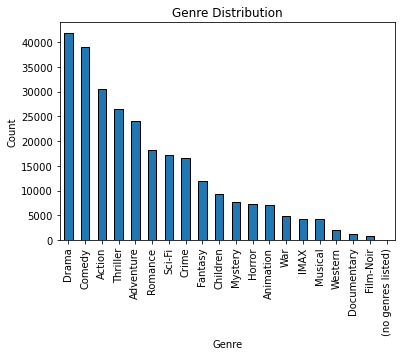

In [19]:
# Split genres into a list
merged_df['genres_list'] = merged_df['genres'].str.split('|')

# Count the occurrences of each genre
genre_counts = merged_df['genres_list'].explode().value_counts()

# Plot the genre counts
genre_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

**This bar graph shows that the most watched top 3 genres are Drama, Comedy and Action.**

Exploring the distribution of rating


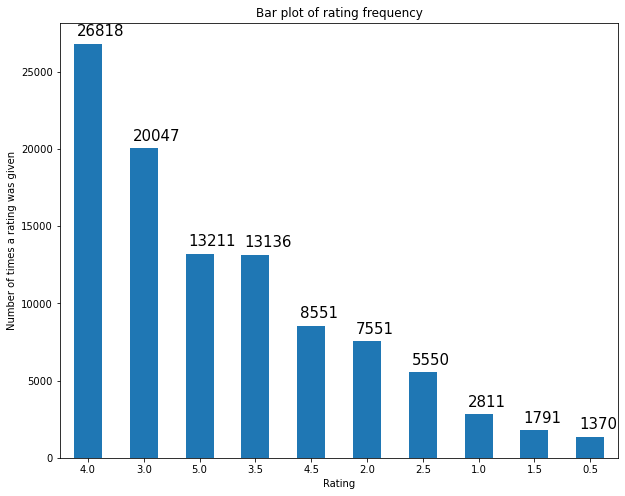

In [20]:


# Plotting the bar plot
merged_df['rating'].value_counts(sort=True).plot(kind='bar', figsize=(10,8), use_index=True, rot=0)

# Adding title and labels
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')

# Adding annotations
label = list(merged_df['rating'].value_counts(sort=True))
ratings = list(merged_df['rating'].value_counts(sort=True).index)
for i in range(len(label)):
    plt.text(x = i - 0.2, y = label[i] + 500, s = label[i], size = 15)

# Show the plot
plt.show()


**Most of the users gave a rating of 4.0 for the movies they watched**

Ratings in a Series presentation

In [21]:
rating_count_df = pd.DataFrame(merged_df.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


We then grouped the best movie titles based on a 5-star rating.

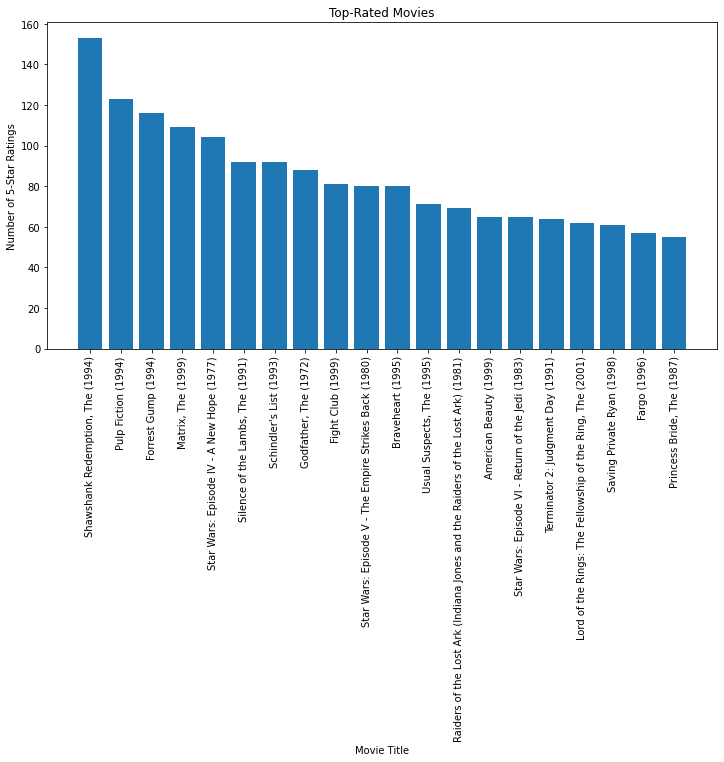

In [22]:
# Grouping by movie title and counting 5-star ratings
movie_ratings = merged_df[merged_df['rating'] == 5].groupby('title')['rating'].count().reset_index()

# Sorting movies based on the number of 5-star ratings
top_rated_movies = movie_ratings.sort_values(by='rating', ascending=False)

# Bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['title'][:20], top_rated_movies['rating'][:20])
plt.xlabel('Movie Title')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for legibility
plt.show()

**We then further looked at the movie title that was most rated by users.**

The most rated movie is 'Forrest Gump (1994)' with movieId 356 and an average rating of 4.16


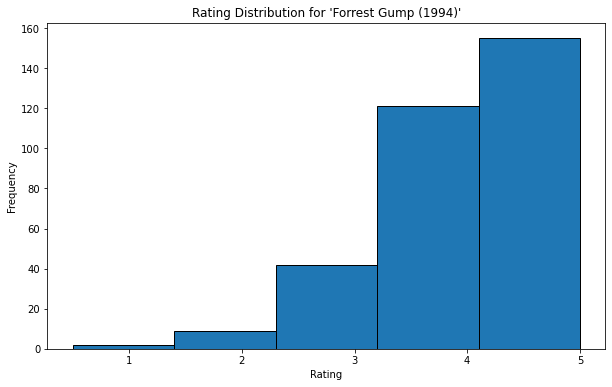

In [23]:
#Get the movie that is rated the most
most_rated_movie = merged_df['movieId'].value_counts().idxmax()
most_rated_movie_title =merged_df.loc[merged_df['movieId'] == most_rated_movie, 'title'].iloc[0]
most_rated_movie_rating = merged_df.loc[merged_df['movieId'] == most_rated_movie, 'rating'].mean()

print(f"The most rated movie is '{most_rated_movie_title}' with movieId {most_rated_movie} "
      f"and an average rating of {most_rated_movie_rating:.2f}")
# Plot the ratings for the most rated movie
plt.figure(figsize=(10, 6))
plt.hist(merged_df.loc[merged_df['movieId'] == most_rated_movie, 'rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f"Rating Distribution for '{most_rated_movie_title}'")
plt.show()

**These were the top 5 rated movies in our dataset**

The movie 'Forrest Gump (1994)' (movieId: 356) has 329.0 ratings with an average rating of 4.16
The movie 'Shawshank Redemption, The (1994)' (movieId: 318) has 317.0 ratings with an average rating of 4.43
The movie 'Pulp Fiction (1994)' (movieId: 296) has 307.0 ratings with an average rating of 4.20
The movie 'Silence of the Lambs, The (1991)' (movieId: 593) has 279.0 ratings with an average rating of 4.16
The movie 'Matrix, The (1999)' (movieId: 2571) has 278.0 ratings with an average rating of 4.19


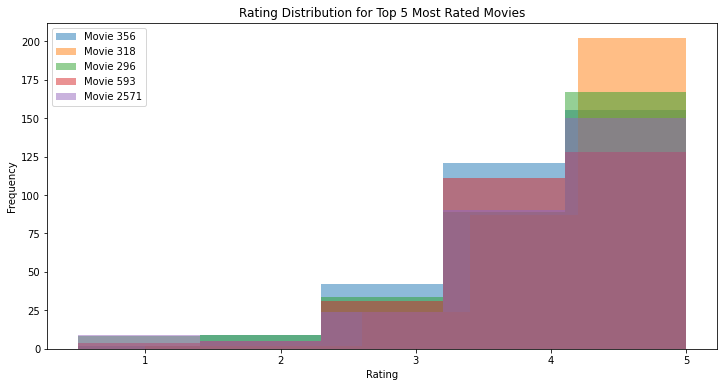

In [106]:
# Get the top 5 rated movies by count of ratings
top_rated_movies = merged_df.groupby('movieId')['rating'].agg(['count', 'mean']).nlargest(5, 'count')

# Print the information for each top rated movie
for movie_id, (rating_count, mean_rating) in top_rated_movies.iterrows():
    movie_title = merged_df.loc[merged_df['movieId'] == movie_id, 'title'].iloc[0]
    print(f"The movie '{movie_title}' (movieId: {movie_id}) has {rating_count} ratings "
          f"with an average rating of {mean_rating:.2f}")

# Plot the ratings for the top 5 most rated movies
plt.figure(figsize=(12, 6))
for movie_id, _ in top_rated_movies.iterrows():
    ratings = merged_df.loc[merged_df['movieId'] == movie_id, 'rating']
    plt.hist(ratings, bins=5, alpha=0.5, label=f'Movie {movie_id}')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Top 5 Most Rated Movies')
plt.legend()
plt.show()

**These were the bottom 10 rated movies in our dataset with a rating <1.**

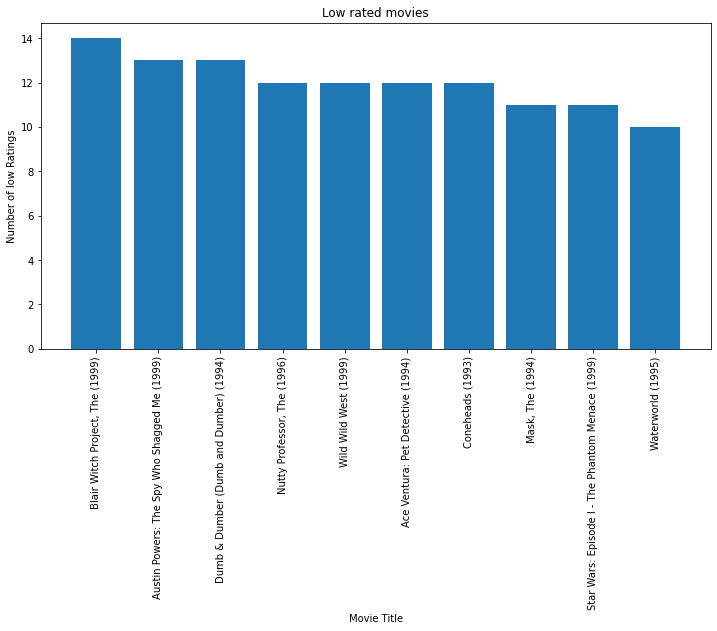

In [25]:
# Let's now explore the lowly rated movies

# Movies with a rating of 1
low_rated_movies = merged_df[merged_df['rating'] <= 1]

# Grouping by movie title and counting the number of 1-star ratings
movie_ratings_count = low_rated_movies['title'].value_counts().reset_index()
movie_ratings_count.columns = ['Title', 'Number of low Ratings']

# Sorting the movies by the number of 1-star ratings in descending order
top_low_rated_movies = movie_ratings_count.sort_values(by='Number of low Ratings', ascending=False)

# Bar plot for the top low-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_low_rated_movies['Title'][:10], top_low_rated_movies['Number of low Ratings'][:10])
plt.xlabel('Movie Title')
plt.ylabel('Number of low Ratings')
plt.title('Low rated movies')
plt.xticks(rotation=90)
plt.show()

# Univariate and bivariate analysis

We will then perform an analysis of individual variables and also look at their correlation with other variables

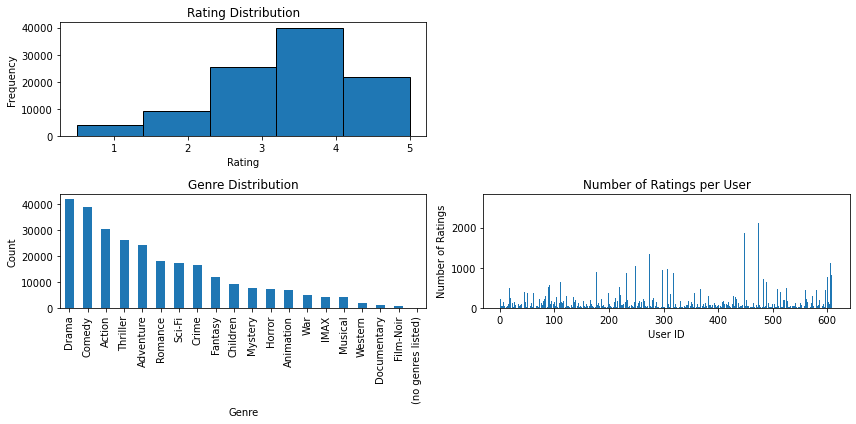

In [26]:
# Univariate Analysis
plt.figure(figsize=(12, 6))

# Rating Distribution
plt.subplot(2, 2, 1)
plt.hist(merged_df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')


# Genre Distribution
plt.subplot(2, 2, 3)
genres = merged_df['genres'].str.get_dummies().sum().sort_values(ascending=False)
genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# User Ratings Count
plt.subplot(2, 2, 4)
user_ratings_count =merged_df['userId'].value_counts()
plt.bar(user_ratings_count.index, user_ratings_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User')

plt.tight_layout()
plt.show()


**Retrieving the top 20 userIds and creating a heatmap to show the relationship between genre and rating given.**

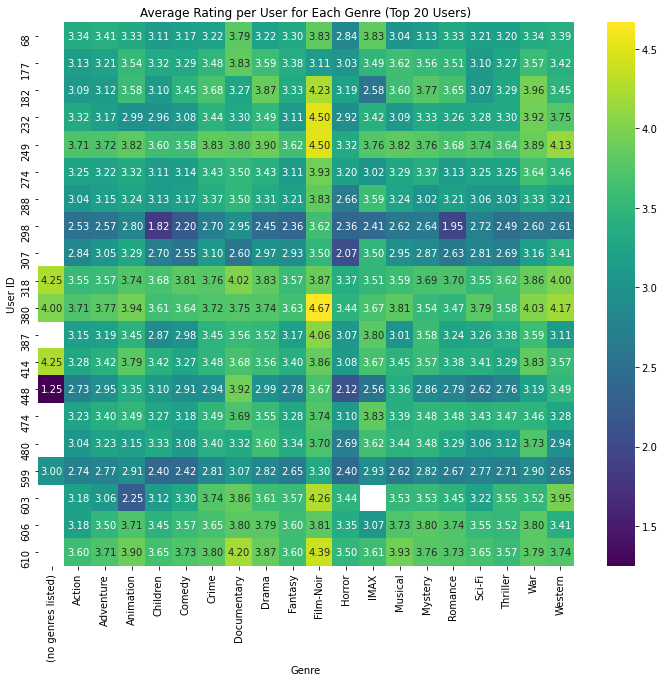

In [27]:
# Get the top 20 user IDs
top_20_users = merged_df['userId'].value_counts().head(20).index

# Filter the dataframe for the top 20 users
df_top_20_users = merged_df[merged_df['userId'].isin(top_20_users)]

# Split genres into a list
genres = df_top_20_users['genres'].str.split('|', expand=True)

# Concatenate the genres with the ratings and user ID
df_genres = pd.concat([df_top_20_users[['userId', 'rating']], genres], axis=1)
# Melt the dataframe to have a single genre column
df_genres_melted = pd.melt(df_genres, id_vars=['userId', 'rating'], value_vars=[0, 1, 2, 3, 4])
df_genres_melted.columns = ['userId', 'rating', 'genre_num', 'genre']

# Calculate the average rating per user for each genre
average_rating_per_user_genre = df_genres_melted.groupby(['userId', 'genre'])['rating'].mean().unstack()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(average_rating_per_user_genre, cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('Genre')
plt.ylabel('User ID')
plt.title('Average Rating per User for Each Genre (Top 20 Users)')
plt.show()

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. In the context of a heatmap showing the average rating per user for each genre, here's how you can interpret it:

Color Intensity: The intensity of the color represents the average rating given by a user for a particular genre. A darker color indicates a higher rating, while a lighter color indicates a lower rating Genres: The rows of the heatmap represent the different users, and the columns represent the different genres. Each cell in the heatmap corresponds to a specific user and genre combination.

Average Ratings: By looking at the heatmap, you can quickly identify which genres each user tends to rate higher or lower. For example, if a user consistently gives high ratings for Action movies (dark color in the "Action" column), you can infer that the user enjoys Action movies. Comparison: Heatmaps can also help you compare the rating patterns of different users across genres. You can identify similarities or differences in their preferences based on the color patterns in the heatmap.





## MODELLING

We used the Surprise package, which is a Python scikit for building and analyzing recommender systems. Surprise provides various collaborative filtering algorithms, making it suitable for our task. we chose the Surprise package for its ease of use and comprehensive support for collaborative filtering algorithms. The choice of models and tuning steps was based on the package's capabilities and the need to find the most accurate recommendation model for our dataset.

## Memory-based collaborative filtering

### Train Test Split
Helps evaluate model perfomance.

We will create a model by first splitting our data into train and test samples using a ratio of 70/30.

In [28]:
#Conducting a train test split on the data
X_train, X_test = train_test_split(merged_df, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70585, 7)
(30251, 7)


    We will pivot the ratings into the movie features ie. userId,movieId and rating.

In [29]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190183,190215,190219,191005,193565,193567,193571,193573,193583,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above matrix returns the rating for the movie rated by the user and a 0 for those not rated.

### Creating a copy of train and test dataset
These datasets will be used for prediction and evaluation of the model.
Dummy train will be used for prediction of the movies which have not been rated by the user whereas the dummy test will be used for model evaluation.

To ignore the movies rated by the user,we will mark it as 0 during prediction.

The movies not rated by user is marked as 1 for prediction.

To evaluate, we will only make prediction on the movies rated by the user.

So, this is marked as 1. This is just opposite of dummy_train

In [30]:
# Making a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

'''
# Lambda function is applied to the the rating column in both dummy_train and
dummy_test
'''
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
# The movies not rated by user is marked as 1 for prediction
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

Checking the first rows of our train and test set

In [32]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190183,190215,190219,191005,193565,193567,193571,193573,193583,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User-User Similarity matrix
This matrix captures the similarity between users based on their movie ratings in the user_data.

It's a square matrix with dimensions (number_of_users, number_of_users).

Each row represents a user, and each column represents another user.

Using Cosine similarity

In [34]:
# Importing the cosine_similarity module
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.02187332 0.02616746 ... 0.20265733 0.06448247 0.10962085]
 [0.02187332 1.         0.         ... 0.02643589 0.04391188 0.06522718]
 [0.02616746 0.         1.         ... 0.00702794 0.         0.00791189]
 ...
 [0.20265733 0.02643589 0.00702794 ... 1.         0.11435659 0.21421564]
 [0.06448247 0.04391188 0.         ... 0.11435659 1.         0.02017565]
 [0.10962085 0.06522718 0.00791189 ... 0.21421564 0.02017565 1.        ]]
(610, 610)


### Cosine Similarity:
Values range from 0 to 1.

1: Identical movie ratings (most similar).

0: No movies rated in common or completely opposite ratings (least similar).

Values closer to 1 indicate higher similarity.
### Output:
The printed output displays the User Similarity Matrix. Each row represents a user, and each column represents another user. The value at a specific row (user) and column (another user) intersection shows their similarity score.

### Short Note:
User Similarity Matrix using Cosine Similarity. Values: 0 (least similar) to 1 (most similar) based on movie ratings. Used for User-Based Collaborative Filtering for movie recommendations.

## Predicting the User ratings on the movies

In [35]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[8.46238500e+01, 3.19328270e+01, 1.99931412e+01, ...,
        3.23986173e-02, 2.83487901e-02, 2.53838538e-01],
       [2.39848830e+01, 1.05603707e+01, 2.56908336e+00, ...,
        4.93110601e-01, 4.31471776e-01, 8.65728295e-01],
       [5.14904707e+00, 2.33866375e+00, 1.48839427e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.07603761e+02, 4.93513807e+01, 2.10233901e+01, ...,
        6.69599786e-02, 5.85899813e-02, 6.35401762e-01],
       [6.34632400e+01, 3.01528688e+01, 1.33211581e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.78805134e-01],
       [7.70232663e+01, 3.15104674e+01, 1.12485516e+01, ...,
        3.45985955e-01, 3.02737711e-01, 8.33514069e-01]])

user_predicted_ratings, represents the predicted movie ratings for all users in the dataset.

### Understanding the Matrix:
It's a 2D array with the same number of rows as users and the same number of columns as movies.
Each row represents a user, and each column represents a movie.
The value at a specific row (user) and column (movie) intersection indicates the predicted rating for that user on that movie.
### Calculation Method:
The code snippet we provided (user_predicted_ratings = np.dot(user_similarity, user_data)) performs matrix multiplication between the User Similarity Matrix (user_similarity) and the user-movie matrix (user_data).
### Interpretation of Values:
The values in user_predicted_ratings represent the predicted ratings on a scale that likely reflects the original rating scale (e.g., 1 to 5 stars).

Higher values indicate movies the user is predicted to enjoy more (higher predicted ratings).

Lower values suggest movies the user might not like as much (lower predicted ratings).

In [36]:
# Getting the shape of the user_predicted_ratings
user_predicted_ratings.shape

(610, 8532)

We do not want to recommend the same movie that the user already watched. We are interested only in the movies not rated by the user, we will ignore the movies rated by the user.

This is where we will use our dummy train matrix that we previously built.

In [37]:
# np.multiply for cell-by-cell multiplication

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190183,190215,190219,191005,193565,193567,193571,193573,193583,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,31.932827,0.000000,0.970626,10.093745,38.040975,13.167573,2.783184,4.082196,44.852786,...,0.289181,0.068686,0.045790,0.036448,0.028349,0.024299,0.032399,0.032399,0.028349,0.253839
2,23.984883,10.560371,2.569083,0.086217,2.339004,10.162367,1.579197,0.439697,0.816889,10.166981,...,0.101113,0.095675,0.063783,0.554749,0.431472,0.369833,0.493111,0.493111,0.431472,0.865728
3,5.149047,2.338664,1.488394,0.078561,0.904560,3.632714,0.985177,0.364076,0.267010,3.474920,...,0.020520,0.013626,0.009084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,52.191239,18.611688,9.047988,1.109513,5.883472,24.402422,9.353388,1.657141,1.837891,26.381719,...,0.231678,0.112741,0.075160,0.058497,0.045498,0.038998,0.051997,0.051997,0.045498,0.290216
5,0.000000,40.407977,17.442226,1.963874,14.706799,33.708505,18.667692,4.239145,4.604870,47.211922,...,0.129298,0.191913,0.127942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215573


Interpreting user_final_ratings in Short Notes:

## Purpose:
Isolates predicted ratings for movies still needing predictions (not rated by the user).

## Creation:
Element-wise multiplication of user_predicted_ratings and dummy_train matrices.

## Structure:
Same dimensions as user_predicted_ratings (users x movies). Values are 0 for movies the user has already rated (based on dummy_train). Values reflect predicted ratings for unrated movies.

## Key Points:
Zeros for rated movies simplify model evaluation and recommendation. Non-zero values guide recommendations for unrated movies. The values reflecting the similarity score the higher the score the more the users are.eg. user 4 and user 1 on movie id 1 have a 52% similarity


Next Steps: Recommend movies with high predicted ratings to the user.

## Top 5 movie recommendations for the (User 42)

In [38]:
#retrieving the top five movie recommendations
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
318    102.470986
593    102.239776
150    100.131445
457     83.206629
527     73.447521
Name: 43, dtype: float64

## Item-based collaborative filtering

In [39]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,0.0,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Pivoting:
It assumes you have a DataFrame X_train containing user-movie ratings data with columns like userId, movieId, and rating.

The code uses the pivot function on X_train to create a new DataFrame called movie_features.

In movie_features, Rows represent movie IDs (movieId). Columns represent user IDs (userId). Values represent the ratings (numerical values) provided by each user for each movie.

Movie_features represents a user-movie matrix suitable for item-based collaborative filtering.

Each cell in the matrix shows a user's rating (or 0 if not rated) for a specific movie.

## Item-Item Similarity matrix
Using Cosine similarity

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.29898457 0.22391203 ... 0.         0.         0.        ]
 [0.29898457 1.         0.20834743 ... 0.         0.         0.        ]
 [0.22391203 0.20834743 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(8532, 8532)


This code calculates the Item-Item Similarity Matrix using cosine similarity. It represents the similarity between each pair of movies in your data.

-The output shows a large square matrix (dimensions: (number_of_movies, number_of_movies)).
-Each value (item_similarity[i, j]) represents the cosine similarity between movie i and movie j.
-Values close to 1 indicate highly similar movies (sharing similar features).
-Values closer to 0 suggest less similarity.
This matrix captures how similar movies are based on their features. It's used for item-based collaborative filtering, where similar movies are recommended to users who liked other similar movies.

## Predicting the User ratings on the movies

In [41]:
#getting user rating based on familiarity
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[1.75597072e+02, 1.18996814e+02, 1.29388072e+02, ...,
        4.74230363e-01, 4.74230363e-01, 3.42846387e+00],
       [1.01373144e+01, 8.75828511e+00, 3.13529612e+00, ...,
        2.28577184e+00, 2.28577184e+00, 5.46468120e+00],
       [5.88907229e+00, 4.96539089e+00, 4.93902850e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.64620395e+02, 2.92352950e+02, 1.99538021e+02, ...,
        1.70295167e+00, 1.70295167e+00, 1.84763469e+01],
       [2.13118416e+01, 1.75784035e+01, 1.19482375e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.49862518e-01],
       [5.14826662e+02, 3.38270423e+02, 1.72250494e+02, ...,
        2.13641588e+01, 2.13641588e+01, 3.89590952e+01]])

### Matrix Multiplication:
It uses np.dot(movie_features.T, item_similarity) to perform matrix multiplication.

movie_features.T represents the transposed user-movie matrix (users as rows, movies as columns).

item_similarity is the item-item similarity matrix calculated earlier.

### Predicted Ratings:
The resulting matrix item_predicted_ratings stores the predicted ratings for each user-movie combination.

### Output Interpretation:
item_predicted_ratings is a large 2D matrix with the same dimensions as movie_features (users x movies). Each element item_predicted_ratings[i, j] represents the predicted rating for user i on movie j. The predicted ratings are calculated based on the user's ratings for similar movies and the item-item similarities. High values in the matrix indicate a higher predicted rating (user might enjoy the movie). Low values suggest a lower predicted rating (user might not enjoy the movie as much).

In [42]:
item_predicted_ratings.shape

(610, 8532)

### Filtering the ratings only for the movies not already rated by the user for recommendation

In [43]:
# np.multiply for cell-by-cell multiplication
# This code snippet focuses on filtering the predicted ratings (item_predicted_ratings)
# to identify movies a user might enjoy but hasn't already rated (recommendations).
item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190183,190215,190219,191005,193565,193567,193571,193573,193583,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,118.996814,0.000000,23.133772,60.581957,132.048898,56.179239,60.386704,28.869752,132.895236,...,6.058141,0.692299,0.692299,0.474230,0.474230,0.474230,0.474230,0.474230,0.474230,3.428464
2,10.137314,8.758285,3.135296,0.298945,4.255284,7.992577,1.195321,2.393030,1.148259,6.640364,...,0.684336,0.231703,0.231703,2.285772,2.285772,2.285772,2.285772,2.285772,2.285772,5.464681
3,5.889072,4.965391,4.939029,0.765647,3.299535,6.348033,2.425237,2.854331,1.431000,5.889038,...,0.196667,0.045509,0.045509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,101.427959,65.684718,51.634564,27.390840,37.976397,91.963227,44.131866,36.627356,13.420183,74.746324,...,4.271284,1.438547,1.438547,0.648673,0.648673,0.648673,0.648673,0.648673,0.648673,4.084436
5,0.000000,29.966630,20.025656,13.081626,18.572332,25.926644,19.728925,15.498188,6.838570,28.740817,...,0.910592,0.686795,0.686795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.924673


### Cell-by-Cell Multiplication:
It uses np.multiply(item_predicted_ratings, dummy_train) to perform element-wise multiplication between two matrices. item_predicted_ratings contains the predicted ratings for all user-movie combinations.

### dummy_train Matrix:
This matrix (assumed to be named dummy_train) likely contains 1s for movies the user has already rated and 0s for unrated movies. It's crucial to ensure dummy_train has the same dimensions (users x movies) as item_predicted_ratings.

### Filtering Effect:
The multiplication essentially sets the predicted ratings for already rated movies (where dummy_train has a 1) to 0. This effectively filters out movies the user has already interacted with, leaving only predicted ratings for unrated movies.

### Output (item_final_ratings):
This matrix now holds the predicted ratings for movies the user hasn't rated. You can use this matrix for recommendation purposes

## Top 5 movie recommendations for the User 42

In [44]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:6]

movieId
150    92.658292
2      90.487035
457    89.231329
344    88.659364
595    86.387734
161    85.430321
Name: 43, dtype: float64

## Evaluation
Evaluation will be the same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the User instead of predicting it for the movie not rated by the user.

In [45]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)

print(test_user_similarity.shape)

[[1.         0.         0.01007938 ... 0.06333985 0.         0.06309773]
 [0.         1.         0.         ... 0.         0.         0.05389711]
 [0.01007938 0.         1.         ... 0.00415615 0.         0.        ]
 ...
 [0.06333985 0.         0.00415615 ... 1.         0.0162698  0.11580065]
 [0.         0.         0.         ... 0.0162698  1.         0.        ]
 [0.06309773 0.05389711 0.         ... 0.11580065 0.         1.        ]]
(610, 610)


## User-User Movie Matrix:

It pivots a DataFrame with user-movie ratings (X_test) to create a user-movie matrix test_user_features suitable for user-based collaborative filtering.

Rows represent users, columns represent movies, and values are ratings (filled with 0 for missing ones).

User Similarity:

It uses cosine_similarity to calculate the similarity between users based on their ratings in test_user_features. This measures how closely two users' tastes align. Missing values (NaNs) are replaced with 0.

Output:

test_user_similarity is a square matrix (dimensions: (number_of_users, number_of_users)). Each value (test_user_similarity[i, j]) represents the cosine similarity between user i and user j.

Interpretation:

Values closer to 1 indicate highly similar users (sharing similar movie preferences). Values closer to 0 suggest less similarity. This matrix can be used for user-based collaborative filtering, where movies are recommended to a user based on the preferences of other similar users.

In [46]:
# Calculate Predicted Ratings for Users in the Test Set using
# User-Based Collaborative Filtering
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 8.80769392,  5.37979608,  2.67339236, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.69546164,  1.20377988,  0.26674807, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21159115,  0.19220665,  0.1070122 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [13.12602419,  9.92789726,  5.2265021 , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.28363498,  5.04235374,  1.92370788, ...,  0.        ,
         0.        ,  0.        ],
       [12.1658682 ,  6.88117983,  2.17230827, ...,  0.1390893 ,
         0.12170313,  0.12170313]])

Matrix Multiplication:

It performs matrix multiplication using np.dot(test_user_similarity, test_user_features). test_user_similarity is the user-user similarity matrix you calculated earlier. test_user_features is the user-movie matrix containing user ratings.

Predicted Ratings:

The resulting matrix user_predicted_ratings_test stores the predicted ratings for each user-movie combination in the test set.

Output Interpretation:

user_predicted_ratings_test is a 2D matrix with the same dimensions as test_user_features (users x movies). Each element user_predicted_ratings_test[i, j] represents the predicted rating for user i on movie j. The predicted ratings are calculated based on the ratings of similar users (from test_user_similarity) and the movies they have rated (in test_user_features).

## Testing on the movies already rated by the user

In [47]:
# aims to filter the predicted ratings (user_predicted_ratings_test) to focus
#  on movies the user in the test set hasn't already rated.
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,12.088979,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell-by-Cell Multiplication:

It uses np.multiply(user_predicted_ratings_test, dummy_test) to perform element-wise multiplication between two matrices.
user_predicted_ratings_test contains the predicted ratings for all user-movie combinations in the test set.

dummy_test Matrix:

This matrix (assumed to be named dummy_test) likely contains 1s for movies the user has already rated and 0s for unrated movies.
It's crucial to ensure dummy_test has the same dimensions (users x movies) as user_predicted_ratings_test.

Filtering Effect:

The multiplication essentially sets the predicted ratings for already rated movies (where dummy_test has a 1) to 0.
This effectively removes movies the user has already interacted with, leaving only predicted ratings for unrated movies.

Output (test_user_final_rating):

This matrix now holds the predicted ratings for movies the user in the test set hasn't rated.
However, the output size might be misleading.

In [48]:
merged_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).

In [49]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

# Copy the test_user_final_rating matrix to avoid modifying the original data
X = test_user_final_rating.copy()

# Filter out zero values (user hasn't rated the movie) before normalization
# Keep only non-zero values (predicted ratings for unrated movies)
X = X[X > 0]

# Create a MinMaxScaler object, specifying the desired output range (0.5 to 5)
scaler = MinMaxScaler(feature_range=(0.5, 5))

# Fit the scaler to the data (learn scaling parameters based on the filtered ratings)
scaler.fit(X)

# Apply the normalization transformation to the filtered data
pred = scaler.transform(X)

# Print the normalized predicted ratings
print("Normalized Predicted Ratings (0.5 to 5):")
print(pred)

Normalized Predicted Ratings (0.5 to 5):
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.83400523 2.26325974 ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


The printed output (pred) now contains the normalized predicted ratings for unrated movies, scaled to the range of 0.5 to 5

In [50]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))

total_non_nan

30251

In [51]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# RMSE Score

# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


RMSE: 1.5552236545586995


## Explanation:
### Squared Differences:
diff_sqr_matrix = (test - pred) ** 2 calculates the element-wise squared difference between the actual ratings (test) and the predicted ratings (pred). Squaring ensures positive values for both positive and negative errors.

### Sum of Squared Errors (SSE):

sum_of_squares_err = diff_sqr_matrix.sum().sum() computes the total sum of squared errors across all users and movies. sum() applied twice sums the elements first across each row (for each user) and then across all columns (to get the total error). By default, sum() ignores NaN values (missing data points).

### RMSE Calculation:

rmse = np.sqrt(sum_of_squares_err / total_non_nan) calculates the Root Mean Squared Error (RMSE). It takes the square root of the average squared error (sum_of_squares_err / total_non_nan). total_non_nan (assumed to be calculated earlier) represents the total number of valid non-NaN values in the pred matrix.

### Interpretation:

The printed RMSE score represents the average magnitude of the errors between the actual ratings and the predicted ratings in your user-based collaborative filtering model. Lower RMSE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings.

In [53]:

# Mean abslute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

MAE: 1.2000097447853961


## Explanation:
### Absolute Differences:
abs_diff_matrix = np.abs(pred - test) calculates the element-wise absolute difference between the actual ratings (test) and the predicted ratings (pred). np.abs ensures positive values for all differences.

### Sum of Absolute Errors (SAE):

sum_of_absolute_errors = abs_diff_matrix.sum().sum() computes the total sum of absolute errors across all users and movies.

Similar to the RMSE calculation, sum() is applied twice to sum absolute errors for each user (row-wise) and then across all users (column-wise). By default, sum() ignores NaN values (missing data points).

### MAE Calculation:

mae = sum_of_absolute_errors / total_non_nan calculates the Mean Absolute Error (MAE).

It divides the total SAE (sum_of_absolute_errors) by the number of valid non-NaN values in pred (total_non_nan).

This provides the average absolute difference between actual and predicted ratings.

### Interpretation:

The printed MAE score (1.202588 in our case) represents the average absolute error between actual ratings and predicted ratings in your collaborative filtering model.

Lower MAE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings on average.

### Comparison with RMSE:

RMSE squares the errors before averaging, giving more weight to larger errors. MAE uses absolute differences, treating all errors equally.

It means that on an average our User-based recommendation engine is making an error of 1.2 in predicting the User ratings.



## Using Item-Item Similarity

In [54]:
# Item-Based Collaborative Filtering

# Create Item-User Rating Matrix (fill missing ratings with 0)
test_item_features = X_test.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Calculate Item-Item Similarity Matrix using Cosine Similarity
test_item_similarity = cosine_similarity(test_item_features)

# Replace NaN values in the similarity matrix with 0 (for better handling)
test_item_similarity[np.isnan(test_item_similarity)] = 0

# Print the Item-Item Similarity Matrix
print("\nItem-Item Similarity Matrix:")
print(test_item_similarity)
print("-" * 10)
print(f"Shape of the matrix: {test_item_similarity.shape}")


Item-Item Similarity Matrix:
[[1.         0.17334393 0.06993553 ... 0.         0.         0.        ]
 [0.17334393 1.         0.03652841 ... 0.         0.         0.        ]
 [0.06993553 0.03652841 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]
----------
Shape of the matrix: (6100, 6100)


## Explanation:
### Item-User Matrix:
test_item_features = X_test.pivot(...) creates an item-user matrix from X_test (assumed to be your user-movie rating data). This pivots the data such that rows represent movies (items) and columns represent users. fillna(0) fills missing ratings (where a user hasn't rated a movie) with 0.

### Item-Item Similarity:

test_item_similarity = cosine_similarity(test_item_features) calculates the cosine similarity between items (movies) based on user ratings. Since the data is now in an item-user format, cosine similarity captures how similar movies are based on how users have rated them. Higher cosine similarity indicates movies are rated similarly by users (suggesting they might be relevant to similar user tastes).

### Handling NaN Values:

test_item_similarity[np.isnan(test_item_similarity)] = 0 replaces any NaN values in the similarity matrix with 0. This might be done for better handling during calculations in item-based collaborative filtering.

### Output:

The code prints the resulting test_item_similarity matrix. It also prints the shape of the matrix using .shape.

### Interpretation:

The printed test_item_similarity matrix shows the cosine similarity between each pair of movies.

A value closer to 1 indicates high similarity (users tend to rate these movies similarly). A value closer to 0 suggests lower similarity (users' ratings diverge for these movies). The shape (test_item_similarity.shape) tells you the dimensions of the matrix (number of movies x number of movies).

In [55]:
# Item-Based Collaborative Filtering - Predicted Ratings

# Calculate Predicted Ratings using Item-Item Similarity
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity)
item_predicted_ratings_test

array([[19.11194189, 23.03432464, 20.8578252 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.99568376,  2.45790128,  1.56444201, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14516714,  0.26524588,  0.21369031, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [52.71945273, 80.71257252, 83.65729549, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.77986362,  2.54585799,  2.64571299, ...,  0.        ,
         0.        ,  0.        ],
       [66.86078402, 78.69653199, 44.02816434, ...,  6.27171661,
         6.27171661,  6.27171661]])

## Interpretation:
The resulting item_predicted_ratings_test matrix contains predicted ratings for users based on item-based collaborative filtering. Each element represents the predicted rating a user might give to a movie, considering how similar movies have been rated by that user and other users.

## Testing on the movies already rated by the user

In [56]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,34.447957,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
merged_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).

In [58]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

# Copy the test_user_final_rating matrix to avoid modifying the original data
X = test_user_final_rating.copy()

# Filter out zero values (user hasn't rated the movie) before normalization
# Keep only non-zero values (predicted ratings for unrated movies)
X = X[X > 0]

# Create a MinMaxScaler object, specifying the desired output range (0.5 to 5)
scaler = MinMaxScaler(feature_range=(0.5, 5))

# Fit the scaler to the data (learn scaling parameters based on the filtered ratings)
scaler.fit(X)

# Apply the normalization transformation to the filtered data
pred = scaler.transform(X)

# Print the normalized predicted ratings
print("Normalized Predicted Ratings (0.5 to 5):")
print(pred)


Normalized Predicted Ratings (0.5 to 5):
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.83400523 2.26325974 ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


The printed output (pred) now contains the normalized predicted ratings for unrated movies, scaled to the range of 0.5 to 5

In [59]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))

total_non_nan

30251

In [60]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# RMSE Score

# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


RMSE: 1.5552236545586995


## Explanation:
Squared Differences:
diff_sqr_matrix = (test - pred) ** 2 calculates the element-wise squared difference between the actual ratings (test) and the predicted ratings (pred). Squaring ensures positive values for both positive and negative errors.

Sum of Squared Errors (SSE):

sum_of_squares_err = diff_sqr_matrix.sum().sum() computes the total sum of squared errors across all users and movies. sum() applied twice sums the elements first across each row (for each user) and then across all columns (to get the total error). By default, sum() ignores NaN values (missing data points).

RMSE Calculation:

rmse = np.sqrt(sum_of_squares_err / total_non_nan) calculates the Root Mean Squared Error (RMSE). It takes the square root of the average squared error (sum_of_squares_err / total_non_nan). total_non_nan (assumed to be calculated earlier) represents the total number of valid non-NaN values in the pred matrix.

Interpretation:

The printed RMSE score represents the average magnitude of the errors between the actual ratings and the predicted ratings in your user-based collaborative filtering model. Lower RMSE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings.

In [62]:
# Mean absolute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

MAE: 1.2000097447853961


## Explanation:
Absolute Differences:
abs_diff_matrix = np.abs(pred - test) calculates the element-wise absolute difference between the actual ratings (test) and the predicted ratings (pred). np.abs ensures positive values for all differences.

Sum of Absolute Errors (SAE):

sum_of_absolute_errors = abs_diff_matrix.sum().sum() computes the total sum of absolute errors across all users and movies.

Similar to the RMSE calculation, sum() is applied twice to sum absolute errors for each user (row-wise) and then across all users (column-wise). By default, sum() ignores NaN values (missing data points).

MAE Calculation:

mae = sum_of_absolute_errors / total_non_nan calculates the Mean Absolute Error (MAE).

It divides the total SAE (sum_of_absolute_errors) by the number of valid non-NaN values in pred (total_non_nan).

This provides the average absolute difference between actual and predicted ratings.

Interpretation:

The printed MAE score (1.202588 in your case) represents the average absolute error between actual ratings and predicted ratings in your collaborative filtering model.

Lower MAE indicates better performance, meaning the model's predictions are generally closer to the actual user ratings on average.

Comparison with RMSE:

RMSE squares the errors before averaging, giving more weight to larger errors. MAE uses absolute differences, treating all errors equally.

It means that on an average our User-based recommendation engine is making an error of 1.2 in predicting the User ratings.



**We need to normalize the final rating values between range (0.5, 5)(unlike a typical 1-5 star rating).**

In [63]:


X = test_item_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 1.87097275 2.44582548 ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [64]:
# calculates the total number of non-NaN values in the normalized pred
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [65]:
# Data transformation - result == user-movie matrix
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,9,10,11,...,188751,188833,190207,190209,190213,190221,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Calculate squared differences between actual and predicted ratings
diff_sqr_matrix = (test - pred) ** 2

# Sum the squared errors across all users and movies (ignoring NaNs)
sum_of_squares_err = diff_sqr_matrix.sum().sum()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(sum_of_squares_err / total_non_nan)

# Print the RMSE score
print("RMSE:", rmse)


RMSE: 2.519468076963487


Interpretation of the RMSE Score:

RMSE: 2.519468076963487 indicates an average error of about 2.52 units on your rating scale between actual and predicted ratings in this particular model.

In [67]:

# Mean abslute error

# Calculate absolute differences between actual and predicted ratings
abs_diff_matrix = np.abs(pred - test)

# Sum the absolute errors across all users and movies (ignoring NaNs)
sum_of_absolute_errors = abs_diff_matrix.sum().sum()

# Calculate MAE (Mean Absolute Error)
mae = sum_of_absolute_errors / total_non_nan

# Print the MAE score
print("MAE:", mae)

MAE: 2.223498526064639


MAE: 2.223498526064639 indicates an average absolute error of about 2.22 units on your rating scale between actual and predicted ratings. A lower MAE generally signifies better model performance.

It means that on an average our Item-based recommendation engine is making an error of 2.21 in predicting the User ratings.

## Conclusion

For the given dataset, the User-based collaborative filtering outperformed Item-based collaborative filtering.

## Model-based collaborative filtering

## SVD METHOD



In this section, we're going to go with collaborative filtering method of modelling. This is because it is in the context of past behaviour. It is based on whether multiple users have the same tastes and preferences and makes recommendations from that as opposed to a content-based recommender whereby it recommends based on the similarity of items.

In [68]:
# Assuming 'userId' is the user ID column, 'movieId' is the movie ID column, and 'rating' is the rating column
user_id_col = 'userId'
movie_id_col = 'movieId'
rating_col = 'rating'

# Create the user-movie rating matrix using pivot_table
rating_matrix = pd.pivot_table(merged_df, values=rating_col, index=user_id_col, columns=movie_id_col, fill_value=0)

# Display a sample of the rating matrix
rating_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


Next is to denormalize the data and convert it into a numpy array

In [69]:
R = rating_matrix.values
ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - ratings_mean.reshape(-1, 1)
Ratings_demeaned
# With Ratings_demeaned the mean of each ratings can be removed to account for bias.

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

This method is based on matrix factorization. It is an unsupervised machine learning method that is used in recommendation systems where it can deal with sparsity and scalability as opposed to the memory-based method.

In [70]:
!pip install pandas wordcloud matplotlib
!pip install surprise

In [71]:
from wordcloud import WordCloud

In [72]:
# Let's check the sparsity of the ratings dataset
sparsity = round(1.0 - len(ratings) / float(unq_users * unq_movies), 3)
print ('The sparsity level of this dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of this dataset is 100.0%


In [73]:
# Let's set up SVD to carry out dimensionality reduction on the 'Ratings_demeaned' matrix
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [74]:
sigma = np.diag(sigma)

Let's make predictions. But before that can happen, we need to add all the individual mean of the ratings feature so as to get the actual ratings predictions.

In [75]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + ratings_mean.reshape(-1, 1)
all_user_predicted_ratings

array([[ 2.16732840e+00,  4.02750508e-01,  8.40183552e-01, ...,
        -2.34533753e-02, -2.34533753e-02, -5.87318552e-02],
       [ 2.11459069e-01,  6.65755884e-03,  3.34547997e-02, ...,
         1.94980595e-02,  1.94980595e-02,  3.22813825e-02],
       [ 3.58844848e-03,  3.05175179e-02,  4.63929239e-02, ...,
         5.90929301e-03,  5.90929301e-03,  8.00411072e-03],
       ...,
       [ 2.16136388e+00,  2.67091989e+00,  2.12845971e+00, ...,
        -4.40029476e-02, -4.40029476e-02,  7.18717825e-02],
       [ 7.80205947e-01,  5.33648654e-01,  9.64537701e-02, ...,
         4.35514249e-03,  4.35514249e-03, -1.34622131e-03],
       [ 5.36398127e+00, -3.40945139e-01, -1.75163291e-01, ...,
        -2.63577616e-02, -2.63577616e-02,  5.15415792e-02]])

We thereafter need to create a dataframe from the predicted user ratings array

In [76]:
ratings = pd.read_csv('ratings.csv')

In [77]:
print("Shape of all_user_predicted_ratings:", all_user_predicted_ratings.shape)
print("Expected shape based on columns:", ratings.shape)

Shape of all_user_predicted_ratings: (610, 9724)
Expected shape based on columns: (100836, 4)


In [78]:
pred = pd.DataFrame(all_user_predicted_ratings, columns=rating_matrix.columns)
pred.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [79]:
ratings.head ()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


A function to come up with the most precise rating prediction on a movie the user has not rated. No features such as movie title or genre was used.

In [80]:
def recommend_movies(predictions, userId, movies, original_ratings, num_recommendations):
    # Get and sort the user's predictions
    user_row_number = userId - 1  # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False)

    # Get the user's data and merge in the movie information
    user_data = original_ratings[original_ratings.userId == userId]
    user_full = user_data.merge(movies, how='left', left_on='movieId', right_on='movieId').sort_values(['rating'], ascending=False)
    
    print('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))

    # Recommend the highest predicted rating movies that the user hasn't seen yet
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how='left', left_on='movieId', right_on='movieId').
         rename(columns={user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending=False).
         iloc[:num_recommendations, :-1]
    )


    return user_full, recommendations

In [81]:
# Recommending 5 movies for user ID 42
already_rated, predictions = recommend_movies(pred, 42, movies, ratings, 20)

User 42 has already rated 440 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [82]:
# Top 20 movies that User 42 has rated
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
220,42,2028,5.0,996217964,Saving Private Ryan (1998),Action|Drama|War
109,42,805,5.0,996218329,"Time to Kill, A (1996)",Drama|Thriller
131,42,1124,5.0,996258339,On Golden Pond (1981),Drama
130,42,1101,5.0,996213578,Top Gun (1986),Action|Romance
126,42,1093,5.0,996219752,"Doors, The (1991)",Drama
125,42,1090,5.0,996212773,Platoon (1986),Drama|War
124,42,1089,5.0,996217838,Reservoir Dogs (1992),Crime|Mystery|Thriller
120,42,1060,5.0,996218466,Swingers (1996),Comedy|Drama
284,42,2706,5.0,996220196,American Pie (1999),Comedy|Romance
286,42,2712,5.0,996216316,Eyes Wide Shut (1999),Drama|Mystery|Thriller


In [83]:
# Top 20 movies that User 42 hopefully will enjoy
predictions

,movieId,title,genres
1099,1732,"Big Lebowski, The (1998)",Comedy|Crime
1884,2916,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
1785,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery
1486,2321,Pleasantville (1998),Comedy|Drama|Fantasy
52,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
412,587,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
1268,2012,Back to the Future Part III (1990),Adventure|Comedy|Sci-Fi|Western
389,543,So I Married an Axe Murderer (1993),Comedy|Romance|Thriller
2065,3175,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi
190,266,Legends of the Fall (1994),Drama|Romance|War|Western


### Evaluation

In evaluating our model, we shall use the surprise library to evaluate the RMSE in this dataset

In [85]:
# Import libraries from Surprise package
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [86]:
# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset for 5-fold cross-validation
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [87]:
# Train the SVD algorithm on the training set
algo = SVD()
algo.fit(trainset)

# Make predictions on the testing set
predictions = algo.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

RMSE: 0.8821
RMSE: 0.882147359739309


An RMSE of 0.88 is really good hence we're going to train on the dataset so as to make predictions

In [88]:
# Initialize SVD algorithm
svd = SVD()

# Train the SVD algorithm on the full dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

In [89]:
# Make predictions on the training set (since we're training on the full dataset)
predictions_train = svd.test(trainset.build_testset())

# Compute MAE on the training set
mae_train = accuracy.mae(predictions_train)
print("MAE on training set:", mae_train)

MAE:  0.4973
MAE on training set: 0.49725403431241294


The MAE using SVD is 0.496.

In [90]:
ratings[ratings['userId'] == 42]

,userId,movieId,rating,timestamp
5875,42,3,4.0,996221045
5876,42,7,3.0,996220162
5877,42,10,5.0,996215205
5878,42,11,5.0,996219314
5879,42,16,5.0,996218017
...,...,...,...,...
6310,42,4623,4.0,996258272
6311,42,4629,2.0,996260295
6312,42,4654,3.0,996260295
6313,42,4679,4.0,996258824


In [91]:
# Using SVD, we'll make a rating prediction that userId 42 will give to a movie he hasn't rated
svd.predict(42, 1994)

Prediction(uid=42, iid=1994, r_ui=None, est=3.819456419783547, details={'was_impossible': False})

So in our predictions for userId 42 and movieId 1994, the estimated rating he would give is 3.294

In [92]:
# Get top 5 movie recommendations for user 42
user_id = 42
top_n = 5

# Get a list of all movie IDs
movie_ids = ratings['movieId'].unique()

# Predict ratings for all movies for user 42
predictions = [svd.predict(user_id, movie_id) for movie_id in movie_ids]

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top N recommendations
top_recommendations = predictions[:top_n]

# Print or return the top N recommendations
for i, pred in enumerate(top_recommendations):
    print(f"Rank {i+1}: Movie ID {pred.iid} - Predicted Rating {pred.est}")



Rank 1: Movie ID 858 - Predicted Rating 4.908295450780382
Rank 2: Movie ID 50 - Predicted Rating 4.867650368175758
Rank 3: Movie ID 260 - Predicted Rating 4.853329571409504
Rank 4: Movie ID 3429 - Predicted Rating 4.7968982578772135
Rank 5: Movie ID 1222 - Predicted Rating 4.748171067801557


SVD method recommends the top 5 movies for user 42 based on the highest rated movieIds.



SVD is a powerful technique in recommendation systems due to its ability to handle sparsity, provide personalized recommendations, and scale to large datasets.

## KNN

In [93]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np



# For train_test_split, we need a 2D array where rows are samples and columns are features
# If Ratings_demeaned is already in the correct shape, skip this step
# If Ratings_demeaned has more dimensions, reshape it to 2D
Ratings_demeaned_2d = Ratings_demeaned.reshape(Ratings_demeaned.shape[0], -1)

# Split the data into training and test sets
X_train, X_test = train_test_split(Ratings_demeaned_2d, test_size=0.2, random_state=42)

# Initialize the KNN model
k = 50  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')

# Fit the model to the training data
knn_model.fit(X_train)

# Function to predict ratings for a given user in the test set
def predict_ratings(user_id):
    # Reshape the user's data to 2D
    user_data = X_test[user_id].reshape(1, -1)

    # Find the k nearest neighbors of the given user
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=k)

    # Get the ratings of the nearest neighbors
    neighbor_ratings = X_train[indices.squeeze()]

    # Calculate the mean rating of the neighbors as the predicted rating for the user
    predicted_rating = neighbor_ratings.mean(axis=0)

    return predicted_rating

# Calculate MSE for the test set
mse_values = []
for user_id in range(X_test.shape[0]):
    predicted_rating = predict_ratings(user_id)
    actual_rating = X_test[user_id]
    mse = mean_squared_error(actual_rating, predicted_rating)
    mse_values.append(mse)

# Calculate RMSE for the test set
rmse_values = np.sqrt(mse_values)

# Calculate the average MSE across all users in the test set
average_mse = np.mean(mse_values)
print("Average MSE:", average_mse)

# Calculate the average RMSE across all users in the test set
average_rmse = np.mean(rmse_values)
print("Average RMSE:", average_rmse)


Average MSE: 0.2165375158507995
Average RMSE: 0.41199614795284933


**The RMSE using KNN method is 0.411 compared to SVD whose RMSE is 0.8791.**

In [94]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for the test set
mae_values = []
for user_id in range(X_test.shape[0]):
    predicted_rating = predict_ratings(user_id)
    actual_rating = X_test[user_id]
    mae = mean_absolute_error(actual_rating, predicted_rating)
    mae_values.append(mae)

# Calculate the average MAE across all users in the test set
average_mae = np.mean(mae_values)
print("Average MAE:", average_mae)


Average MAE: 0.15717221032330397


MAE using KNN method is 0.157

In [95]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'k': [20, 30, 40], 'sim_options': {'name': ['cosine', 'pearson']}}

# Create the GridSearchCV object
gs_knn = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)

# Fit the GridSearchCV object to the data
gs_knn.fit(data)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computi

In [96]:

# Initialize the KNN model
k = 50  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')

# Fit the model to your demeaned ratings data
knn_model.fit(Ratings_demeaned)

# Function to get recommendations for a given user
def get_recommendations(user_id, num_recommendations=5):
    # Reshape the user's data to 2D
    user_data = Ratings_demeaned[user_id].reshape(1, -1)

    # Find the k nearest neighbors of the given user
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=num_recommendations+1)

    # Exclude the user itself (first element of 'indices' array)
    neighbor_indices = indices.squeeze()[1:]

    # Return the indices of the nearest neighbors
    return neighbor_indices



In [103]:

from sklearn.neighbors import KNeighborsRegressor


# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['cosine', 'euclidean', 'manhattan']  # Distance metric
}

# Create a dummy target variable for the KNNRegressor
dummy_y_train = np.zeros_like(X_train[:, 0])
# Initialize the KNN model
knn_model = KNeighborsRegressor()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, dummy_y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to initialize the KNN model
best_knn_model = KNeighborsRegressor(**best_params)

# Fit the best model to the training data
best_knn_model.fit(X_train, dummy_y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to initialize the KNN model
best_knn_model = KNeighborsRegressor(**best_params)

# Fit the best model to the training data
best_knn_model.fit(X_train, dummy_y_train)

# Calculate the average MSE and RMSE across all users in the test set
average_mse = np.mean(mse_values)
average_rmse = np.mean(rmse_values)

print("Average MSE:", average_mse)
print("Average RMSE:", average_rmse)

Best Hyperparameters: {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'uniform'}
Best Hyperparameters: {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'uniform'}
Average MSE: 0.2165375158507995
Average RMSE: 0.41199614795284933


In [104]:
# Initialize the KNN model
k = 5  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute')

# Fit the model to your demeaned ratings data
knn_model.fit(Ratings_demeaned)

# Function to get recommendations for a given user
def get_recommendations(user_id, num_recommendations=5):
    # Reshape the user's data to 2D
    user_data = Ratings_demeaned[user_id].reshape(1, -1)

    # Find the k nearest neighbors of the given user
    distances, indices = knn_model.kneighbors(user_data, n_neighbors=num_recommendations+1)

    # Exclude the user itself (first element of 'indices' array)
    neighbor_indices = indices.squeeze()[1:]

    # Return the indices of the nearest neighbors
    return neighbor_indices


In [105]:
# Example: Get recommendations for user with ID 42
user_id = 42

recommendations = get_recommendations(user_id)
print("Recommendations for user", user_id, ":", recommendations)

Recommendations for user 42 : [239 583 591 469 394]


## Findings

**Memory-based collaborative filtering**

We used item-based vs user-based modelling and these were the findings:
    
Using item-based method,the MAE was 2.223 and the RMSE was 2.519.

With user-based modelling, the MAE 1.202 was and the RMSE was 1.555 .

**Model-based collaborative filtering**

We used SVD and KNN methods and the we found that:
    
The MAE using SVD was 0.49 and the RMSE was 0.879.
    
The MAE using KNN was 0.157 and the RMSE was 0.411.

## Limitations of KNN

Here are some key limitations of KNN:

1. Computational Cost:

Distance Calculation: KNN requires calculating distances between the new data point and all points in the training data to find the nearest neighbors. This can be computationally expensive, especially for large datasets with many features (high dimensionality).
Storage Requirements: KNN stores the entire training data for distance calculations during prediction. This can lead to high memory usage for big datasets.

2. Sensitivity to Irrelevant Features and Feature Scaling:

Curse of Dimensionality: As the number of features (dimensions) in your data increases, the distance between data points becomes less meaningful. This can negatively impact the accuracy of KNN.

Feature Scaling: KNN is sensitive to the scale of features. Features with larger scales will dominate the distance calculation, potentially leading to misleading results.  It's crucial to properly scale your features before using KNN.

3. The Choice of K:

K-value Selection: The parameter K represents the number of nearest neighbors to consider for prediction. Choosing a very small K can lead to overfitting, while a large K can result in underfitting. Finding the optimal K value often involves experimentation.

4. Handling Missing Values and Outliers:

Missing Values: KNN can be sensitive to missing values in the data. Missing values can affect the distance calculation and lead to inaccurate predictions. Techniques like imputation are needed to address missing data.

Outliers: Outliers in the data can significantly influence the nearest neighbors and skew the predictions. It's advisable to identify and handle outliers before using KNN.

. Interpretability:

Black Box Nature: While the core idea of KNN is simple, understanding the specific reasoning behind predictions can be challenging. KNN doesn't inherently provide insights into feature importance or how the model arrived at a particular prediction.

## Recommendations

Use a Hybrid Approach: Combining both KNN and SVD models can offer the benefits of both memory-based and model-based collaborative filtering. This hybrid approach can enhance recommendation accuracy and cater to different user preferences.
Continuously Update Models: Regularly updating the models with new user ratings and movie data can improve the accuracy and relevance of recommendations over time.

Provide Transparency: Explainable recommendations can increase user trust and engagement. Providing explanations for why certain movies are recommended can help users understand and appreciate the suggestions.

Overall, utilizing a combination of KNN and SVD models in a recommendation system can enhance user engagement, satisfaction, and the accuracy of movie recommendations. Continuous improvement and adaptation based on user feedback and behavior are key to maintaining a successful recommendation system.

Based on the performance metrics of the different collaborative filtering methods, we can draw the following conclusions and recommendations for your recommendation system:

Memory-Based Collaborative Filtering:

Item-Based: MAE = 2.223, RMSE = 2.519

User-Based: MAE = 1.202, RMSE = 1.555

Recommendation: User-based collaborative filtering outperforms item-based collaborative filtering in terms of both MAE and RMSE.
Therefore, for memory-based collaborative filtering, it is recommended to use the user-based approach.
Model-Based Collaborative Filtering:

SVD: MAE = 0.49, RMSE = 0.879

KNN: MAE = 0.157, RMSE = 0.411

Recommendation: Both SVD and KNN significantly outperform memory-based collaborative filtering methods in terms of MAE and RMSE. Among the two, KNN has the lowest MAE and RMSE, indicating that it is the better-performing model for this dataset.
Overall Recommendation:

Best Model: Based on the performance metrics and objectives, the KNN model is the best choice for our recommendation system. It provides the most accurate movie recommendations for each user, as evidenced by its low MAE and RMSE.


## System Objectives:

The KNN model aligns well with the system objectives of enhancing user engagement and satisfaction by providing tailored movie suggestions that align with their preferences. It utilizes collaborative filtering to analyze user ratings and generates accurate movie recommendations.

## Implementation:

Implementing the KNN model in our recommendation system will provide personalized movie suggestions to users. The system should be regularly updated and optimized based on user feedback and new ratings data to maintain its effectiveness and accuracy.